In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd

In [2]:
# reading csv file
df = pd.read_csv('../dataset/crops_final.csv')

In [3]:
# converting from pandas dataframe to numpy
np_inputs = df.to_numpy()

In [4]:
# inputs are from col-6 to col-13
inputs = np_inputs[:, 6:14]
inputs = np.array(inputs, dtype='float32')

print(inputs)


# convert output crops to binary encoded labels
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(np_inputs[:,14])
outputs = lb.transform(np_inputs[:,14])

outputs = np.array(outputs, dtype='float32')

print(outputs)

[[33.259373   7.030931  60.84086   ... 15.602418   6.7222724 10.1207695]
 [33.324234   6.562556  64.75895   ... 16.013498   6.084758  11.4723835]
 [33.736282   6.557421  61.573425  ... 16.430769   5.703082  11.680659 ]
 ...
 [25.8816     6.181125  30.692217  ... 53.876553  23.047926  12.743419 ]
 [24.774702   6.929148  58.6065    ... 47.295223  24.395452  11.042995 ]
 [23.613468   6.6437187 53.63108   ... 54.34586   26.842375  13.102743 ]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [5]:
# converting numpy array into torch tensors
inputs = torch.from_numpy(inputs)
outputs = torch.from_numpy(outputs)

print(inputs)
print(outputs)

tensor([[33.2594,  7.0309, 60.8409,  ..., 15.6024,  6.7223, 10.1208],
        [33.3242,  6.5626, 64.7589,  ..., 16.0135,  6.0848, 11.4724],
        [33.7363,  6.5574, 61.5734,  ..., 16.4308,  5.7031, 11.6807],
        ...,
        [25.8816,  6.1811, 30.6922,  ..., 53.8766, 23.0479, 12.7434],
        [24.7747,  6.9291, 58.6065,  ..., 47.2952, 24.3955, 11.0430],
        [23.6135,  6.6437, 53.6311,  ..., 54.3459, 26.8424, 13.1027]])
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


In [6]:
from torch.utils.data import TensorDataset

In [7]:
ds = TensorDataset(inputs,outputs)
print(len(ds))
print(ds[0:3])

121081
(tensor([[33.2594,  7.0309, 60.8409, 32.7850, 37.2703, 15.6024,  6.7223, 10.1208],
        [33.3242,  6.5626, 64.7589, 29.3024, 36.9567, 16.0135,  6.0848, 11.4724],
        [33.7363,  6.5574, 61.5734, 29.1465, 36.2751, 16.4308,  5.7031, 11.6807]]), tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))


In [8]:
from torch.utils.data import random_split

In [9]:
train_ds, valid_ds = random_split(ds, [96865, 24216])
len(train_ds), len(valid_ds)

(96865, 24216)

In [10]:
from torch.utils.data import DataLoader

In [11]:
batch_size = 64
train_loader = DataLoader(train_ds , batch_size , shuffle=True )
val_loader = DataLoader(valid_ds , batch_size)
print(len(train_loader))

1514


In [12]:
from torch import nn

# defining neural network parameteres
input_nodes = 8
hidden1_nodes = 64
hidden2_nodes = 64
output_nodes = 29

# creating neural net
class Model(nn.Module):
    def __init__(self):
        super().__init__()

        self.input = nn.Linear(input_nodes, hidden1_nodes)
        self.hidden1 = nn.Linear(hidden1_nodes, hidden2_nodes)
        self.hidden2 = nn.Linear(hidden2_nodes, output_nodes)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.input(x)
        x = self.relu(x)
        x = self.hidden1(x)
        x = self.relu(x)
        x = self.hidden2(x)
        x = self.softmax(x)

        return x

In [13]:
model = Model()
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1737,  0.2860,  0.3418,  0.3165, -0.2222,  0.0916, -0.0760, -0.0645],
         [-0.1592, -0.3264, -0.0261, -0.1733,  0.2720, -0.2364,  0.1779,  0.2441],
         [-0.2995,  0.1391,  0.3227,  0.1141, -0.0889,  0.3007,  0.2142, -0.0777],
         [-0.3493, -0.0545,  0.1866, -0.2905,  0.1551, -0.2486,  0.2347,  0.2071],
         [-0.1365,  0.3288, -0.2804, -0.0777, -0.1762,  0.0796,  0.2921, -0.2484],
         [-0.2762, -0.2739,  0.0439,  0.2465,  0.1861,  0.1913,  0.2362, -0.3021],
         [ 0.2912, -0.1736, -0.2331,  0.1485, -0.2144, -0.1230,  0.2357,  0.0167],
         [ 0.0027, -0.2358, -0.2927,  0.1545, -0.2930,  0.0097,  0.0464,  0.1298],
         [ 0.0670, -0.3334,  0.1535,  0.1283,  0.2919,  0.0885, -0.3315, -0.0403],
         [ 0.0873,  0.3246, -0.2126, -0.1473, -0.1392,  0.2308,  0.0449, -0.2419],
         [ 0.1537,  0.0982, -0.2386,  0.3435,  0.3207, -0.1766,  0.0199, -0.2200],
         [ 0.3154, -0.3310,  0.1581,  0.1463, -0.3118, -0.0217, 

In [14]:
import torch.nn.functional as F

loss_dict={}
def train(model,epochs,train_batch,valid_batch,lr,opt_fn=torch.optim.SGD):
    opt = opt_fn(model.parameters(), lr)
    for epoch in range(epochs):
        loss_dict[epoch] = 0
        i = 0
        for input_part, output_part in train_batch:
            i+=1
            output = model(input_part)
            loss = F.mse_loss(output,output_part)
            loss_dict[epoch]+=loss
            loss.backward()
            opt.step()
            opt.zero_grad()
            #print("Done with {0} part of {1}/{2}".format(i,epoch,epochs))
        loss_dict[epoch]/1514
        print("For epoch {0} avg_loss = {1}".format(epoch,loss_dict[epoch]))
    return loss_dict

In [15]:
epochs = 60
lr = 1e-2

history = train(model, epochs, train_loader, val_loader, lr)

For epoch 0 avg_loss = 47.72978973388672
For epoch 1 avg_loss = 40.6528434753418
For epoch 2 avg_loss = 35.86530303955078
For epoch 3 avg_loss = 31.41950035095215
For epoch 4 avg_loss = 28.898696899414062
For epoch 5 avg_loss = 26.880281448364258
For epoch 6 avg_loss = 25.05280303955078
For epoch 7 avg_loss = 22.525779724121094
For epoch 8 avg_loss = 20.965139389038086
For epoch 9 avg_loss = 18.899246215820312
For epoch 10 avg_loss = 18.009607315063477
For epoch 11 avg_loss = 17.379968643188477
For epoch 12 avg_loss = 16.88858985900879
For epoch 13 avg_loss = 16.5014705657959
For epoch 14 avg_loss = 16.183528900146484
For epoch 15 avg_loss = 15.915989875793457
For epoch 16 avg_loss = 15.694823265075684
For epoch 17 avg_loss = 15.50417709350586
For epoch 18 avg_loss = 15.338512420654297
For epoch 19 avg_loss = 15.19038200378418
For epoch 20 avg_loss = 15.056122779846191
For epoch 21 avg_loss = 14.926414489746094
For epoch 22 avg_loss = 14.791873931884766
For epoch 23 avg_loss = 14.64160

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 

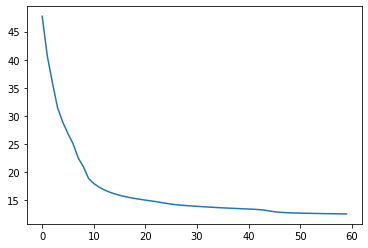

In [23]:
plt.plot(list(loss_dict.keys()), list(loss_dict.values()))
plt.show()

In [24]:
torch.save(model.state_dict(), 'crop_prediction_weights.pth')

In [25]:
model.state_dict()

OrderedDict([('input.weight',
              tensor([[ 1.4240e-01,  3.0208e-01,  3.3952e-01,  4.0957e-01, -2.1840e-01,
                        7.7345e-02, -1.1007e-01, -6.7018e-02],
                      [-1.6411e-01, -3.2685e-01, -3.2188e-02, -1.7808e-01,  2.6823e-01,
                       -2.3882e-01,  1.7069e-01,  2.4261e-01],
                      [-2.9862e-01,  1.3380e-01,  3.0032e-01,  8.4978e-02, -1.1280e-01,
                        3.9817e-01,  3.1366e-01, -8.1339e-02],
                      [-3.3819e-01, -7.2151e-02,  2.0203e-01, -3.1742e-01,  1.6309e-01,
                       -3.4058e-01,  2.2519e-01,  2.2271e-01],
                      [-1.3653e-01,  3.2881e-01, -2.8039e-01, -7.7726e-02, -1.7620e-01,
                        7.9638e-02,  2.9207e-01, -2.4837e-01],
                      [-2.6533e-01, -2.8714e-01,  2.9645e-02,  2.8596e-01,  2.1628e-01,
                        2.1521e-01,  2.7535e-01, -3.3423e-01],
                      [ 2.9354e-01, -1.7299e-01, -2.2842e-01,  1

In [26]:
model2 = Model()
model2.load_state_dict(torch.load('crop_prediction_weights.pth'))
model2.state_dict()

OrderedDict([('input.weight',
              tensor([[ 1.4240e-01,  3.0208e-01,  3.3952e-01,  4.0957e-01, -2.1840e-01,
                        7.7345e-02, -1.1007e-01, -6.7018e-02],
                      [-1.6411e-01, -3.2685e-01, -3.2188e-02, -1.7808e-01,  2.6823e-01,
                       -2.3882e-01,  1.7069e-01,  2.4261e-01],
                      [-2.9862e-01,  1.3380e-01,  3.0032e-01,  8.4978e-02, -1.1280e-01,
                        3.9817e-01,  3.1366e-01, -8.1339e-02],
                      [-3.3819e-01, -7.2151e-02,  2.0203e-01, -3.1742e-01,  1.6309e-01,
                       -3.4058e-01,  2.2519e-01,  2.2271e-01],
                      [-1.3653e-01,  3.2881e-01, -2.8039e-01, -7.7726e-02, -1.7620e-01,
                        7.9638e-02,  2.9207e-01, -2.4837e-01],
                      [-2.6533e-01, -2.8714e-01,  2.9645e-02,  2.8596e-01,  2.1628e-01,
                        2.1521e-01,  2.7535e-01, -3.3423e-01],
                      [ 2.9354e-01, -1.7299e-01, -2.2842e-01,  1